<a href="https://colab.research.google.com/github/jihyunjeongme/data-analysis-kaggle/blob/master/House_Price_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **목차**
---
## 1. 데이터 탐색
- 문제 정의
- 변수 설명
- 시각화
- 이상치 및 결측치 확인
- 유니크 갯수

## 2. 데이터 전처리
- 이상치 및 결측치 처리
- 정규화

## 3. 변수 생성

## 4. 모델링
- 회귀
- GMB (LGB/XGB)
- 앙생블

## 5. 잔차분석


## 1-1. 문제정의
- 독립변수
- 종속변수


### 변수설명
#### File descriptions
- train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
- test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
- sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.
---------

- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [0]:
# Loading package
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 시각화 도구
import seaborn as sns 

%matplotlib inline
import gc

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/\
2019 2nd ML month with KaKR

/content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/2019 2nd ML month with KaKR


In [0]:
df_train = pd.read_csv('./train.csv')
df_test  = pd.read_csv('./test.csv')
df_submission = pd.read_csv('./sample_submission.csv')

In [0]:
# 훈련과 평가 데이터의 크기는 15000과 6500
# 비율 5:2
# 변수의 갯수 20개

print("train.csv. Shape: ",df_train.shape)
print("test.csv. Shape: ",df_test.shape)

train.csv. Shape:  (15035, 21)
test.csv. Shape:  (6468, 20)


In [0]:
# null 값이 있는지 확인
df_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

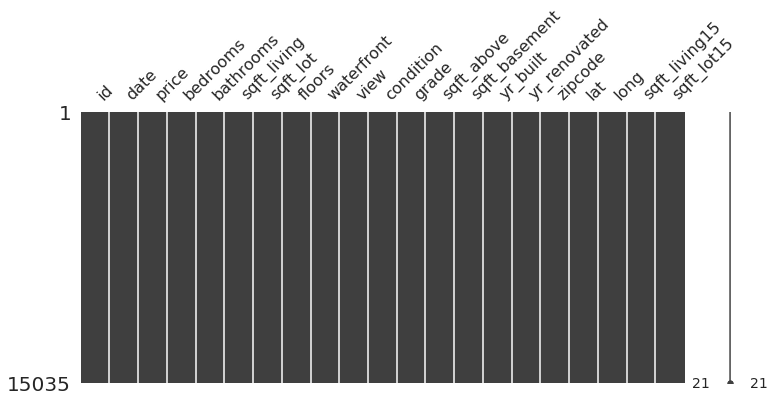

In [0]:
# null 값이 있는지 확인

import missingno as msno

msno.matrix(df_train, figsize=(12, 5))

In [0]:
#descriptive statistics summary
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
#descriptive statistics summary(가격)
df_train['price'].describe()

# min, max의 차이가 큼
# std가 굉장히 큼

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

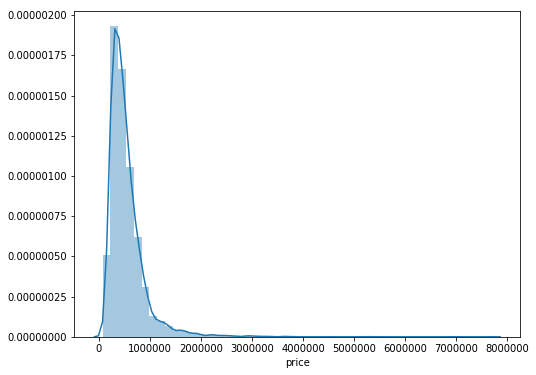

In [0]:
# histogram

f, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_train['price'])

In [0]:
# skeness and kurtosis(왜도, 첨도)
# 왜도 : 오른쪽 꼬리가 갈수록 값이 더큼
# 첨도: 첨도 값(K)이 3에 가까울 경우, scatter은 정규 분포에 가깝습니다.
# (K < 3), 분포가 정규 분포보다 더 평탄하다고 판단 할 수 있으며, 첨도가 3보다 큰 양수인 경우 (K>3),
# 분포가보다 뾰족한 분포로 간주 할 수 있습니다.

#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())



Skewness: 4.290252
Kurtosis: 40.154919


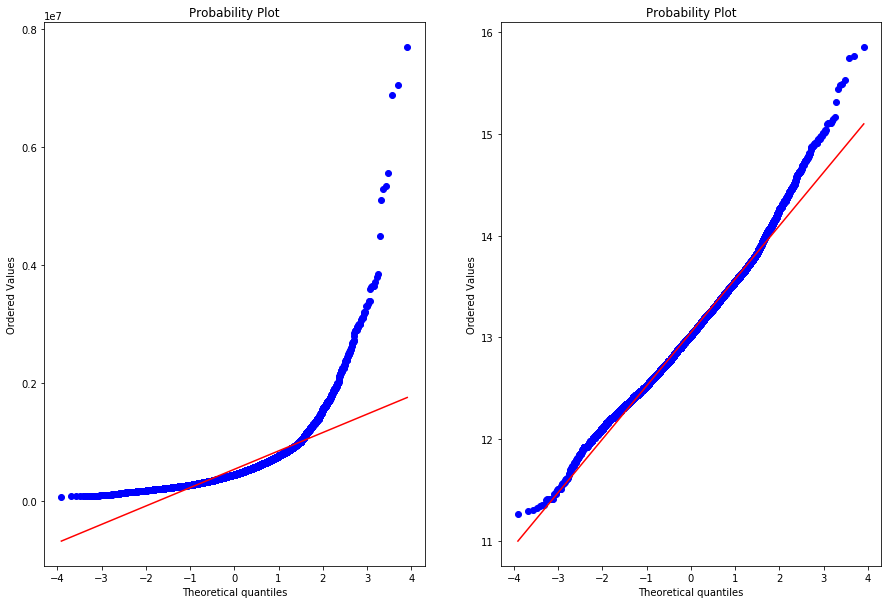

In [0]:
fig = plt.figure(figsize = (15, 10))

# 위의 종속변수(가격)의 경우 첨도, 왜도도 굉장히 정규분포를 따르지 않고, 분산 또한 매우 큰것으로 확인
# 회귀모델을 사용 할 것이기 때문에 Normalize를 통해 price의 분포가 정규분포를 가지도록 만듬

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

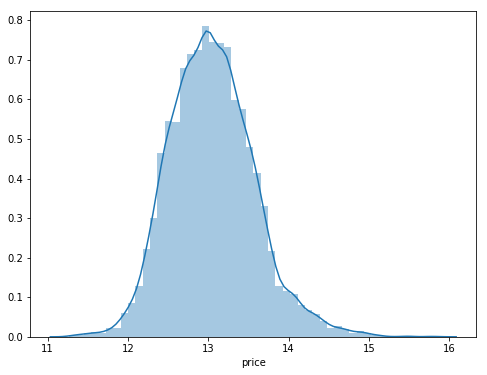

In [0]:
# log를 취해주면 기존보다 더 정규성을 가지는 것을 확인 할 수 있습니다.
df_train['price'] = np.log1p(df_train['price'])

# histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

# **변수의 시각화 (종속변수)**

---
## 피어슨 상관관계: 연속형 변수에 사용
## 스피어만 순위 상관관계: 범주형 변수도 포함되었을 경우에 사용



['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


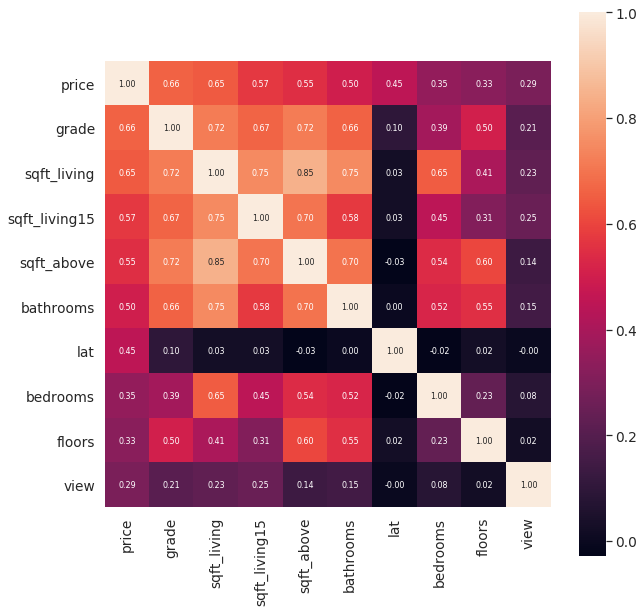

In [0]:
# orrelation이 높은 상위 10개의 heatmap
# continuous + sequential variables --> spearman
# abs는 반비례관계도 고려하기 위함
# https://www.kaggle.com/junoindatascience/let-s-eda-it 참고사용

import scipy as sp

cor_abs = abs(df_train.corr(method='spearman'))

# price와 correlation이 높은 columns 10개 뽑기(내림차순)
cor_cols = cor_abs.nlargest(n=10, columns='price').index

# spearman coefficient matrix

# 10 x 10
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0]
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size': 8}
           , xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [0]:
# 종속변수(가격)과 상관도 가 높은 순은 grade > sqft_living > sqft_living15 순인데
# 특이점은 lat(위도) 값이 있다는 것! 위도가 증가함에 따라 가격이 왜 증가하는지 이따 지도로 한번 살펴볼 것




In [0]:
# 우선 데이터 셋을 한번 다 봅니다.
df_train.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


In [0]:
df_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [0]:
df_submission.head()


,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [0]:
# 가격별로 우선 한번 쓱 데이터를 보고 어떤 독립변수가 가격에 영향을 끼치는지 고민해 봅니다.

df_train.sort_values(by='price', ascending=False)

# 기본적으로 아래의 독립변수가 종속변수 가격에 영향을 줄것으로 보임 
# bedrooms, bathrooms, sqft_living, waterfrot, view, grade, 
# sqft_above, sqft_basement, yr_built(지어진연도가 그나만 최근), yr_renovated(재건축 최근)
# sqft_living15, sqft_lot15

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
2775,2775,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1045,1045,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
947,947,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
842,842,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1882,1882,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
1499,1499,20141114T000000,3850000.0,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748
4957,4957,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570


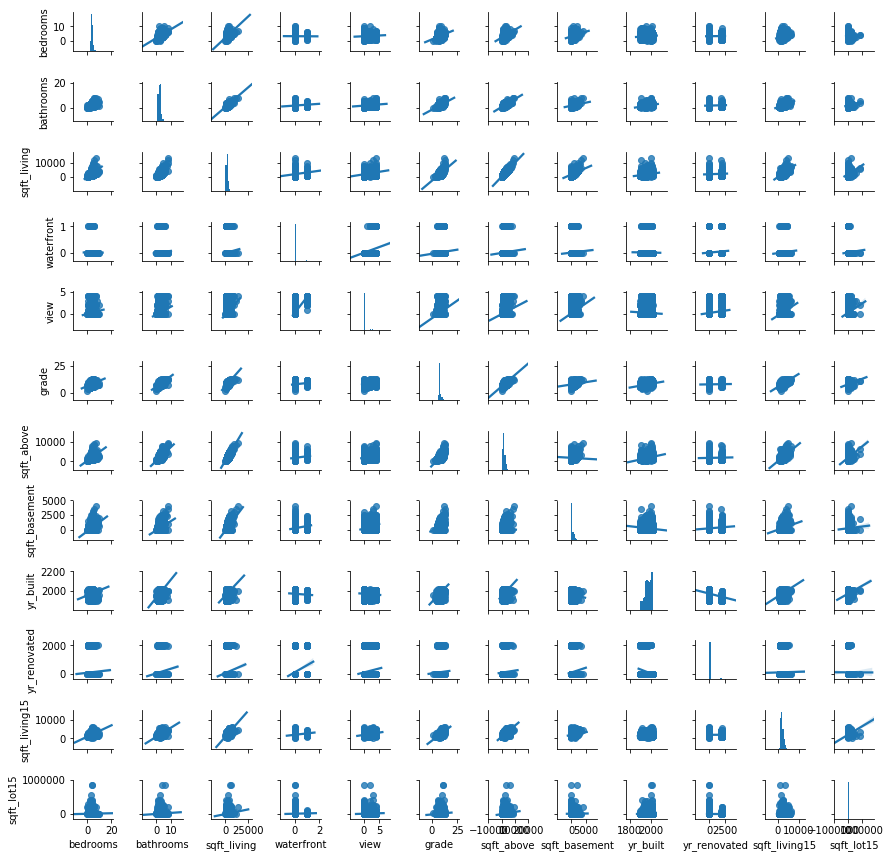

In [0]:
# 기본적으로 아래의 독립변수가 종속변수 가격에 영향을 줄것으로 보임 
# bedrooms, bathrooms, sqft_living, waterfrot, view, grade, 
# sqft_above, sqft_basement, yr_build(지어진연도가 그나만 최근), yr_renovated(재건축 최근)
# sqft_living15, sqft_lot15

sns.pairplot(df_train, vars=["bedrooms", "bathrooms", "sqft_living","waterfront"
                             ,"view","grade","sqft_above","sqft_basement"
                             ,"yr_built","yr_renovated","sqft_living15"
                             ,"sqft_lot15"], kind='reg', height=1)
plt.show()

In [0]:
# 가격과 변수들간의 차이 



In [0]:
# 지도로 표시하기 위해 사용 

import folium

In [0]:
# 위도, 경도를 주면 지도를 그려줌

map_osm = folium.Map(location=[47.5112,-122.257	])
map_osm



In [0]:
# 위도 경도 자료가 있어서 folium 사용 가능

map = folium.Map(location=[47.5112, -122.257	],zoom_start=13)
folium.Marker([47.5112, -122.257	], popup='id0').add_to(map)
map